In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D

In [23]:
data=sio.loadmat('ex8data1.mat')
data1=sio.loadmat('ex8data2.mat')
data['X'].shape

(307, 2)

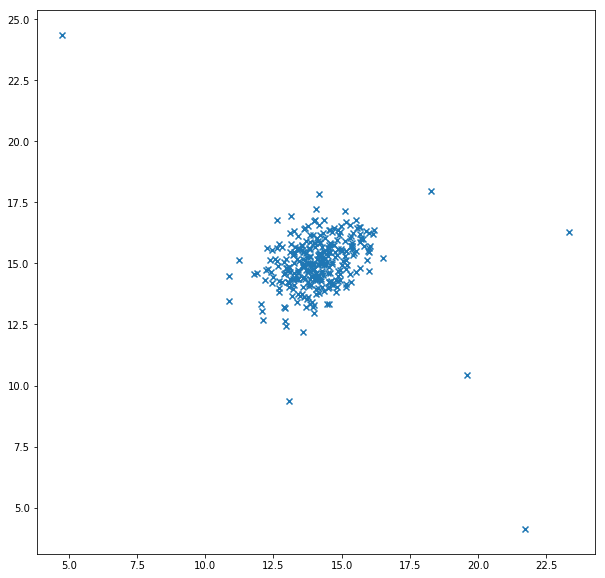

In [3]:
fig=plt.figure(figsize=(10, 10)) 

plt.scatter(data['X'][:,0],data['X'][:,1],marker='x',edgecolor='none')
plt.show()

In [4]:
def Estimate_para(data):
    mu=np.mean(data,axis=0)
    sigma=np.mean((data-mu)**2,axis=0)
    return mu,sig

def Gaussian_calc(data,mu,sig):
    p=np.exp(-((data-mu)**2)/(2*sig))/np.sqrt(2*np.pi*sig)
    #p=np.exp(-((data['X'] - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return p


In [5]:
def Estimate_mul_para(data):
    #mu=data.sum()/(data.shape[0]*data.shape[1])
    mu=np.mean(data,axis=0)
    sig=np.cov(data.T)
    return mu,sig

def Gaussian_mul_calc(x,mu,sig):
    p=np.exp(-((x-mu).reshape(1,-1).dot(np.linalg.pinv(sig)).dot((x-mu).reshape(-1,1)))/2)/((2*np.pi)**(x.shape[0]/2)*np.sqrt(np.linalg.det(sig)))
    return p[0][0]

In [6]:
mus,sigs=Estimate_mul_para(data['X'])

In [55]:
Gaussian_mul_calc(data['X'][0],mus,sigs)
print(data['X'].shape)

(307, 2)


In [60]:
x=data['Xval']
x=np.arange(x.min(),x.max()).reshape(-1,1)
px,py=np.meshgrid(x,x)
# for a,b in zip(px,py):
#     print(np.array([a,b]).shape)

In [61]:
def gaus_meshgrid_calc(px,py):
    listx=[]
    for px_item,py_item in zip(px,py):
        vec_x=np.array([px_item,py_item]).T
        list_vec=[]
        for each_x in vec_x:
            p=Gaussian_mul_calc(each_x,mus,sigs)
            list_vec.append(p)
        listx.append(list_vec)
    return np.array(listx)

In [117]:
# datax=data['X']
# #x=np.arange(x.min(),x.max()).reshape(-1,1)
# listx=[]
# for x in datax:
#     p=Gaussian_mul_calc(x,mus,sigs)
#     listx.append(p)


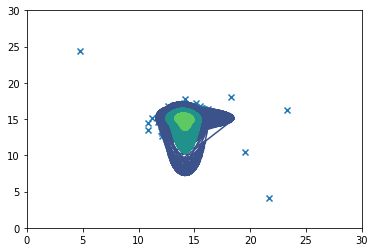

In [64]:
X, Y = np.meshgrid(data['X'][:,0], data['X'][:,1])
z=gaus_meshgrid_calc(X,Y)

plt.axis([0,30,0,30])
plt.contour(X, Y, z,4)
plt.scatter(data['X'][:,0],data['X'][:,1],marker='x')
#ps这里是原始数据的高斯分布，需要补充设置的数据的分布

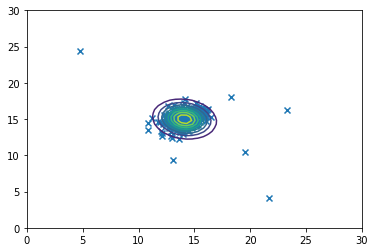

In [71]:
x=np.arange(x.min(),x.max(),0.5).reshape(-1,1)
px,py=np.meshgrid(x,x)
z=gaus_meshgrid_calc(px,py)
plt.axis([0,30,0,30])
plt.contour(px,py, z,10)
plt.scatter(data['X'][:,0],data['X'][:,1],marker='x')

In [144]:
mu,sig=Estimate_para(data['X'])#使用原始数据计算出均值和方差
mu1,sig1=Estimate_para(data['Xval'])

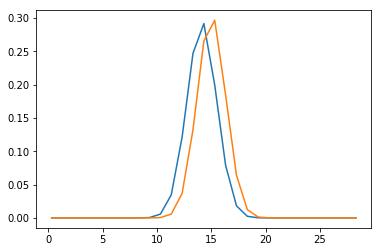

In [187]:
x=data['Xval']
x=np.arange(x.min(),x.max()).reshape(-1,1)
#使用原始数据计算出的均值和方差得到高斯计算式，来计算一段数据
p1=Gaussian_calc(x,mu[0],sig[0])
p2=Gaussian_calc(x,mu[1],sig[1])
plt.plot(x,p1)
plt.plot(x,p2)

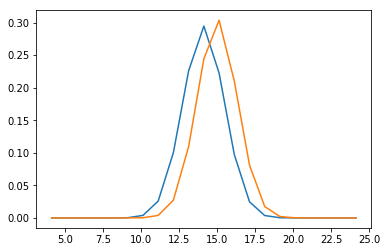

In [188]:
x=data['X']
x=np.arange(x.min(),x.max()).reshape(-1,1)
#使用原始数据计算出的均值和方差得到高斯计算式，来计算一段数据
p1=Gaussian_calc(x,mu[0],sig[0])
p2=Gaussian_calc(x,mu[1],sig[1])
plt.plot(x,p1)
plt.plot(x,p2)

#原始数据
x1=data['X'][:,0]
x2=data['X'][:,1]
p3=Gaussian_calc(x1,mu[0],sig[0])
p4=Gaussian_calc(x2,mu[1],sig[1])
# plt.scatter(x1,p3)
# plt.scatter(x2,p4)

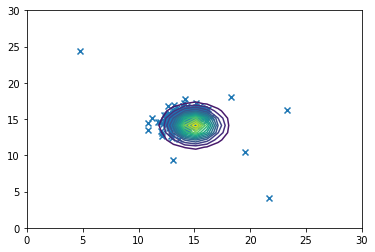

In [196]:
X, Y = np.meshgrid(x, x)
plt.axis([0,30,0,30])
plt.contour(X, Y, p1.dot(p2.T),15)
plt.scatter(data['X'][:,0],data['X'][:,1],marker='x')

In [ ]:
data1

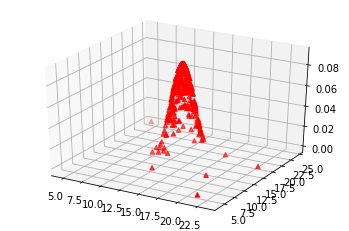

In [129]:
x=data['X'][:,0]
y=data['X'][:,1]
z=p[:,0]*p[:,1]
ax = plt.figure().add_subplot(111, projection = '3d') 
#基于ax变量绘制三维图 
#xs表示x方向的变量 
#ys表示y方向的变量 
#zs表示z方向的变量，这三个方向上的变量都可以用list的形式表示 
#m表示点的形式，o是圆形的点，^是三角形（marker) 
#c表示颜色（color for short） 
ax.scatter(x, y, z, c = 'r', marker = '^') #点为红色三角形 

TypeError: Shape of x does not match that of z: found (307, 307) instead of (307, 2).

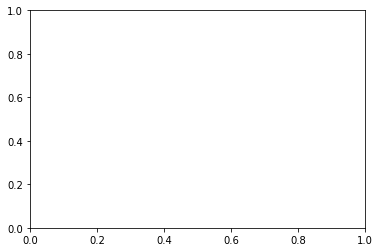

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 计算x,y坐标对应的高度值
def f(x, y):
 return (1-x/2+x**5+y**3) * np.exp(-x**2-y**2)

# 生成x,y的数据
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

# 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
X, Y = np.meshgrid(x, y)
print(X.shape,Y.shape)
f(X, Y).shape



(256, 256) (256, 256)


(256, 256)